# Malicious URL Detection Using Machine Learning




In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd       # Data structures and data analysis tools, reading and manipulating data
import itertools          # Creating and manipulating iterators
import numpy as np        # supports large multi-dimensional arrays and performing various operations on them
import os                 # provides way to interact with OS, manipulating files and directories

# 1. Define the Problem
 Determine the type of problem, whether it is classification, regression, clustering, or something else.
 This is based on classification. Classification is a type of supervised learning where the goal is to assign input data to predefined categories or classes.

# 2. Gather Data
 Collect the relevant data for your problem. This may involve acquiring data from various sources, such as databases, APIs, or public datasets.

# 3. Data Preprocessing
 Prepare and preprocess the data to make it suitable for training a machine learning model. This step includes handling missing values, handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.

# 4. Select a Model
 Choose an appropriate machine learning algorithm or model that best suits your problem and data. Common choices include decision trees, random forests, support vector machines, neural networks, etc.

# 5. Train the Model
 Use the training dataset to train the selected model. The model learns from the input data.

# 6. Model Evaluation
 Evaluate the trained model using the testing dataset. Measure its performance using appropriate metrics such as accuracy, precision, recall, F1-score, or mean squared error.

# 7. Finalize the Model
 Train the model on the entire dataset using the selected hyperparameters.

# 8. Deploy the Model
 Integrate the trained model into the desired application or system.

# 9. Make Predictions
 Use the deployed model to make predictions on new, unseen data. Preprocess the new data in the same way as the training data and feed it into the deployed model to obtain predictions or classifications.

# 10. Monitor and Maintain
 Continuously monitor the model's performance and retrain it periodically if necessary.

# Collecting Data
Malicious URL DataSet from Kaggle    
651191 URLs

In [3]:
df = pd.read_csv('malicious_phish.csv')
print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df.type.value_counts()        # counts unique values and returns in decreasing order

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# Plotting wordcloud
DATA VISUALISING TECHNIQUE

In [5]:
!pip install wordcloud
from wordcloud import WordCloud  # Graphical representation of word frequency in text corpus, data preproccesing, model evaluation, visualization
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

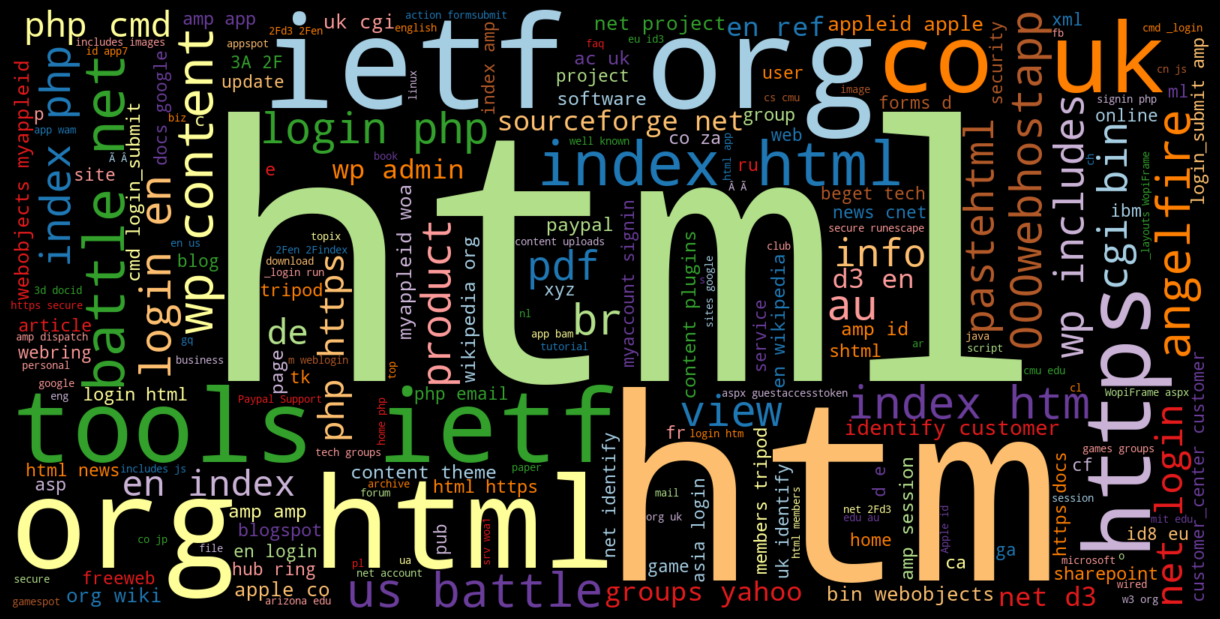

In [6]:
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations in Python
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(phish_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

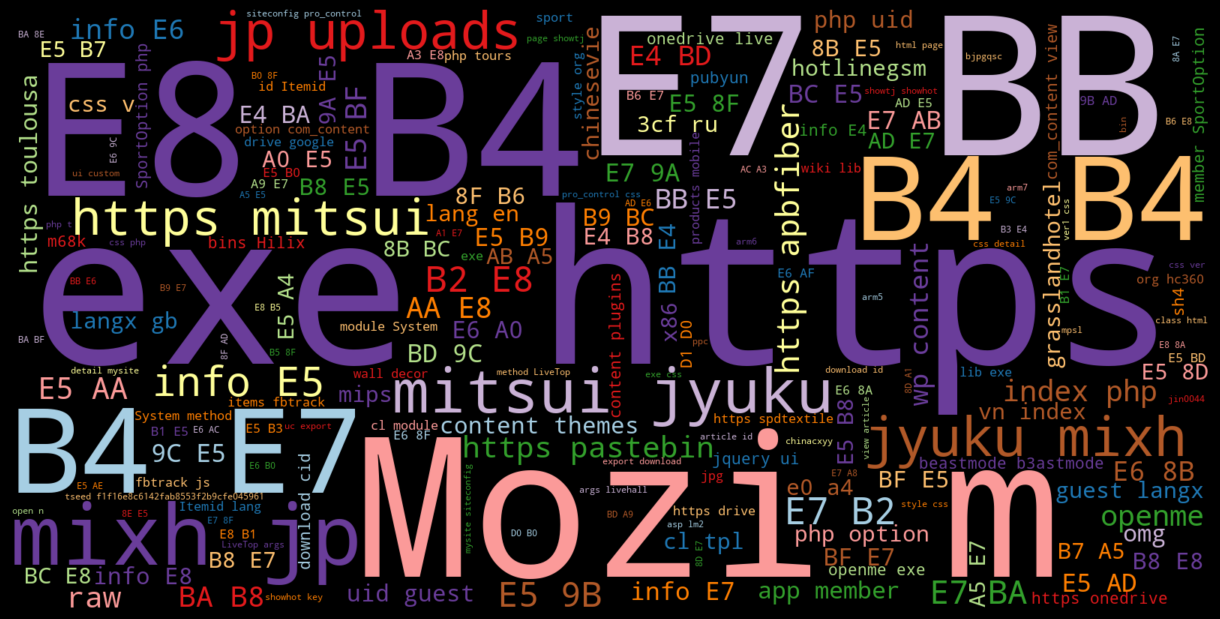

In [7]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(malware_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

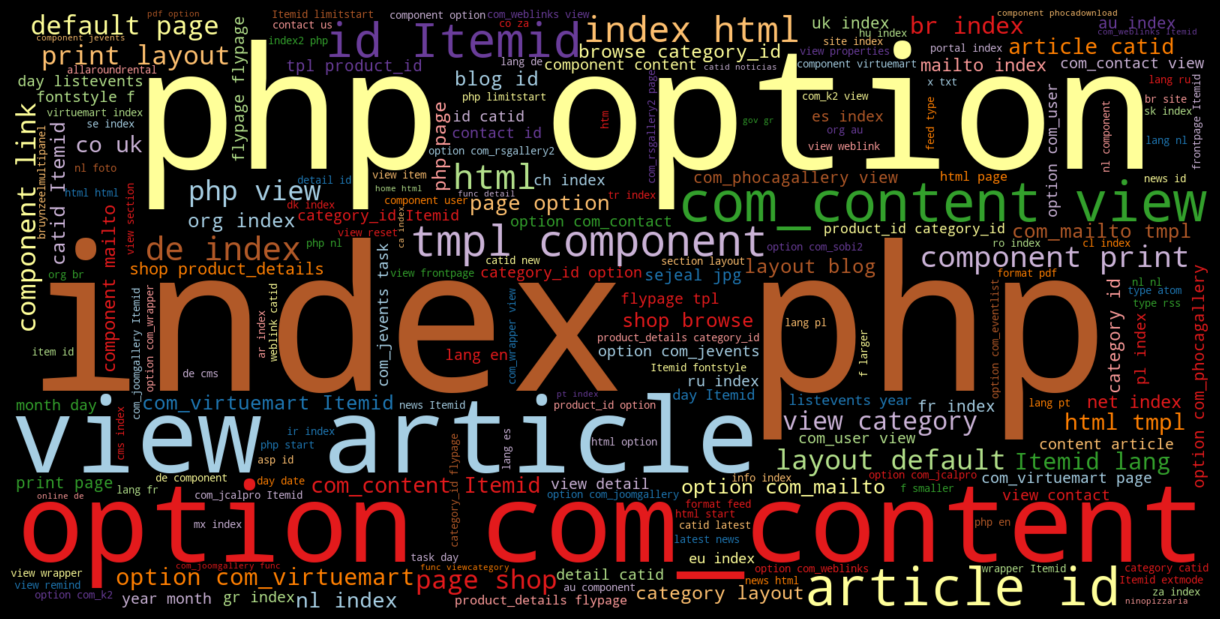

In [8]:
deface_url = " ".join(i for i in df_deface.url)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(deface_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

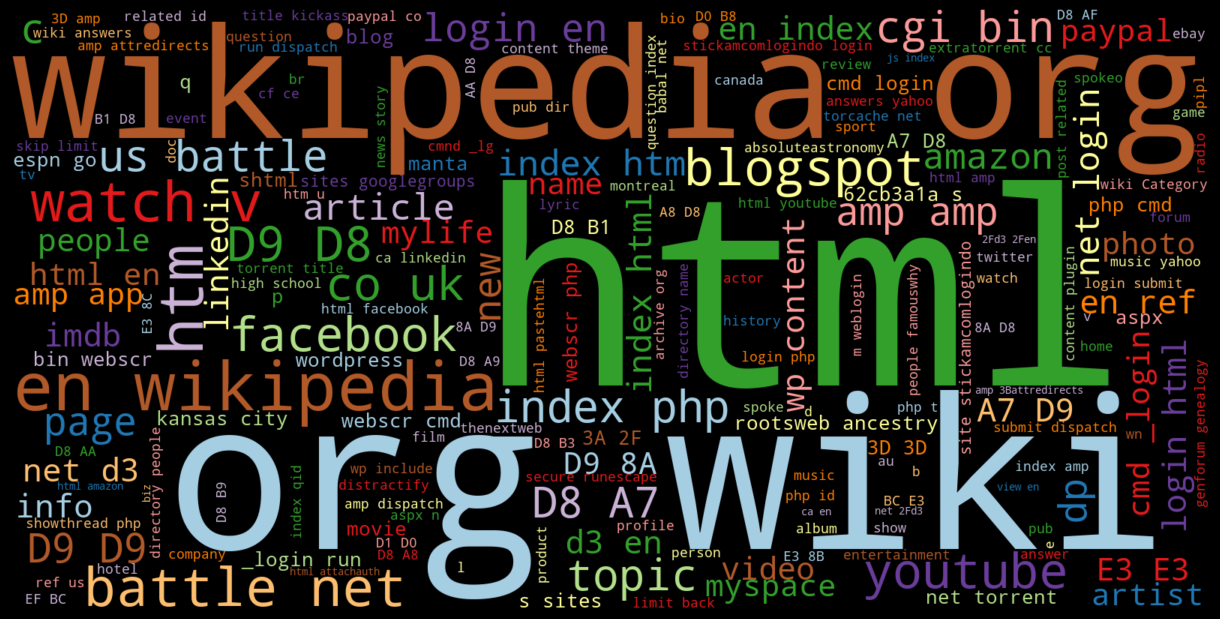

In [9]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800, colormap='Paired').generate(benign_url)
plt.figure(figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Feature Extraction
DATA PROCESSING AND DATAFRAME MANIPULATION


In [12]:
import re # Regular Expression (matching of IP addresses in URLs)
pip install googlesearch-python

# Has IPv4 or IPv6 IP address
def having_ip_address(url):
  match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
  if match:
    return 1
  else:
    return 0
df['use_of_ip'] = df['url'].apply(lambda i:having_ip_address(i))

from urllib.parse import urlparse  #provides functions for parsing and manipulating URLs, used to parse a given URL and extract its components.

# Is URL abnormal
def abnormal_url(url):
  hostname = urlparse(url).hostname
  hostname = str(hostname)
  match = re.search(hostname, url)
  if match:
    return 1
  else:
    return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

!pip install googlesearch-python # installing google search and its dependencies
from googlesearch import search

# IS URL Google Indexed
def google_index(url):
  site = search(url, 5)
  return 1 if site else 0
df['google_index'] =df['url'].apply(lambda i: google_index(i))

# Count dots (.)
def count_dot(url):
  count_dot = url.count('.')
  return count_dot
df['count.'] = df['url'].apply(lambda i:count_dot(i))

# Count www
def count_www(url):
  url.count('www')
  return url.count('www')
df['count-www'] = df['url'].apply(lambda i:count_www(i))

# Count @
def count_atrate(url):
  return url.count('@')
df['count@'] = df['url'].apply(lambda i:count_atrate(i))

# Count directories
def no_of_dir(url):
  urldir = urlparse(url).path
  return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i:no_of_dir(i))

# Count embedded domains
def no_of_embed(url):
  urldir = urlparse(url).path
  return urldir.count('//')
df['count_embed_domain'] = df['url'].apply(lambda i:no_of_embed(i))

# Is URL short
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
      return 1
    else:
      return 0
df['short_url'] = df['url'].apply(lambda i:shortening_service(i))

# Count https
def count_https(url):
  return url.count('https')
df['count-https'] = df['url'].apply(lambda i: count_https(i))

# Count http
def count_http(url):
  return url.count('http')
df['count-http'] = df['url'].apply(lambda i: count_http(i))

# Count percentage (%)
def count_per(url):
  return url.count('%')
df['count%'] = df['url'].apply(lambda i: count_per(i))

# Count question (?)
def count_ques(url):
  return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))

#count hyphen(-)
def count_hyphen(url):
  return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

#count equals(=)
def count_equal(url):
  return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

#Length of URL
def url_length(url):
    return len(str(url))
df['url_length'] = df['url'].apply(lambda i: url_length(i))

#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

#Suspicious Words
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

#Digit count
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

# Letter Count
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

#Importing dependencies
!pip install tld
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
df.head()

SyntaxError: invalid syntax (3665866937.py, line 2)

In [13]:
df = df.drop("tld",1)

C:\Users\simey\AppData\Local\Temp\ipykernel_2780\2551734815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


KeyError: "['tld'] not found in axis"

In [14]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url'], dtype='object')

#EDA
Exploratory Data Analysis (EDA) in machine learning refers to the process of exploring and analyzing the dataset to gain insights and understand the characteristics of the data. It involves using various statistical and visual techniques to examine the data, identify patterns, relationships, and anomalies, and make informed decisions about preprocessing, feature engineering, and model selection.

ValueError: Could not interpret input 'short_url'

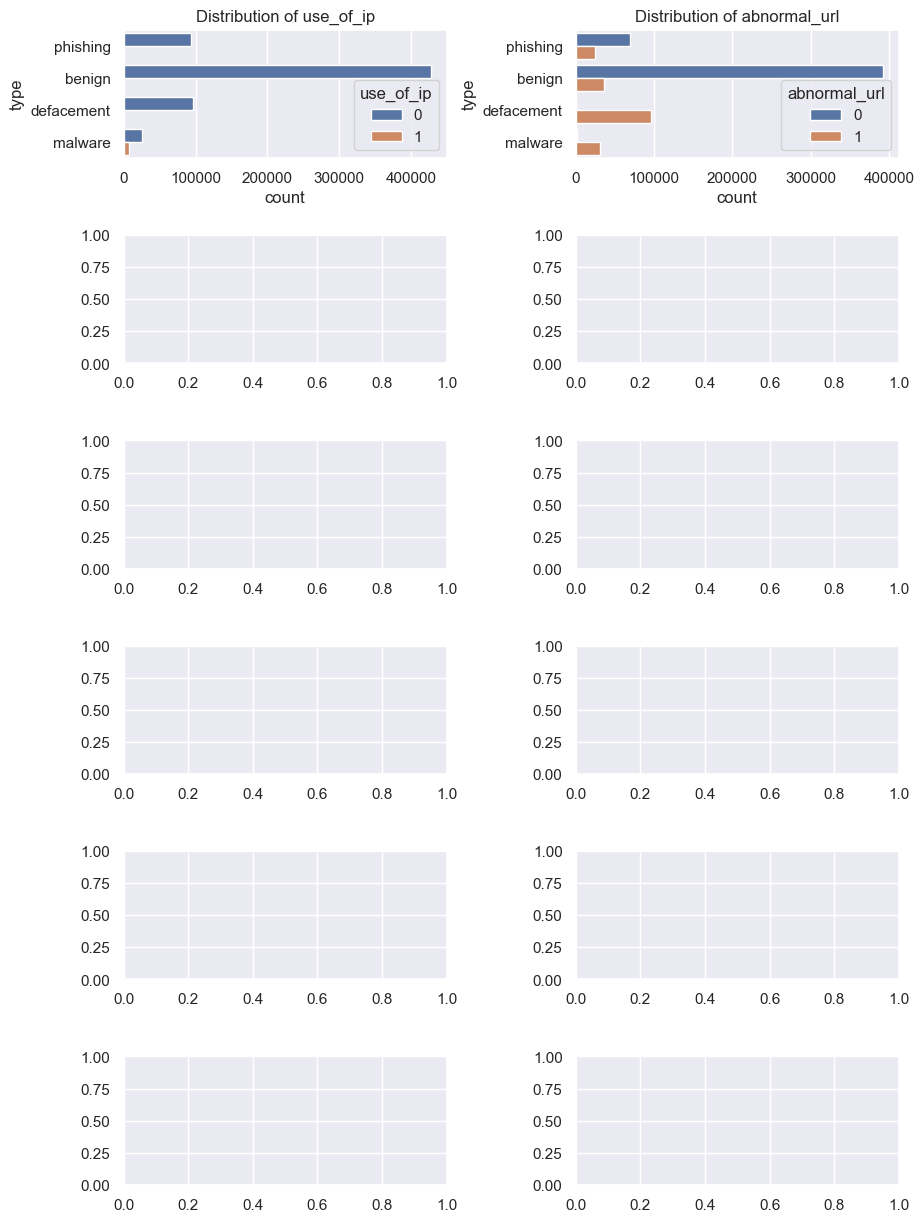

In [19]:
import seaborn as sns  # data visualization lib for creating attractive nad informative statistical graphics built on top of plt
sns.set(style="darkgrid")
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations in Python

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))

# Plot 1
sns.countplot(y="type", data=df, hue="use_of_ip", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of use_of_ip")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot 2
sns.countplot(y="type", data=df, hue="abnormal_url", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of abnormal_url")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot 3
sns.countplot(y="type", data=df, hue="google_index", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of google_index")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot 4
sns.countplot(y="type", data=df, hue="short_url", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of short_url")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot 5
sns.countplot(y="type", data=df, hue="sus_url", ax=axes[2, 0])
axes[2, 0].set_title("Distribution of sus_url")
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Plot 6
"""sns.countplot(x="type", data = df, hue="count.", ax=axes[2, 1])
axes[2, 1].set_title("Distribution of count.")
plt.subplots_adjust(wspace=0.4, hspace=0.6)"""
sns.boxplot(x="type", y="count.", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Distribution of count.")
plt.tight_layout(pad=1.5)

# Plot 7
sns.boxplot(x="type", y="count-www",  data=df, ax=axes[3, 0])
axes[3, 0].set_title("Distribution of count-www")
plt.tight_layout(pad=1.5)

# Plot 8
sns.boxplot(x="type", y="count@", data=df, ax=axes[3, 1])
axes[3, 1].set_title("Distribution of count@")
plt.tight_layout(pad=1.5)

# Plot 9
sns.boxplot(x="type", y="count_dir", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Distribution of count_dir")
plt.tight_layout(pad=1.5)

# Plot 10
sns.boxplot(x="type", y="hostname_length", data=df, ax=axes[4, 1])
axes[4, 1].set_title("Distribution of hostname_length")
plt.tight_layout(pad=1.5)

# Plot 11
sns.boxplot(x="type", y="fd_length", data=df, ax=axes[5, 0])
axes[5, 0].set_title("Distribution of fd_length")
plt.tight_layout(pad=1.5)

# Plot 12
sns.boxplot(x="type", y="tld_length", data=df, ax=axes[5, 1])
axes[5, 1].set_title("Distribution of tld_length")
plt.tight_layout(pad=1.5)

plt.show()


# Target encoding
The LabelEncoder from scikit-learn is used to encode the target variable type into numeric labels (type_code).

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

# Creation of feature and target(Data Preparation)

In [ ]:
# Predictor Variables
# Filtering out google_index as it has only 1 value
X = df[['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

# Target Variable
y = df['type_code']
df.head()

In [ ]:
X.columns

# Train test split
The predictor variables(X) and target variable(y) will be split into X_train, X_test, y_train, and y_test, representing the training and testing sets, respectively. The training set will contain 80% of the data, and the testing set will contain 20% of the data.

In [ ]:
# 80% train data, 20% test data
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split    # for splitting training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

# Model Building

# 1. Random Forest Classifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # predictive data analysis
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified parameters
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
# Train the classifier
rf.fit(X_train,y_train)
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))
# Evaluate the accuracy of the classifier
score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
# Create a figure and set its size
plt.figure(figsize=(8,6))
# Plot the confusion matrix as a heatmap with annotations
sns.heatmap(cm_df, annot=True,fmt=".1f")
# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
# Display the heatmap
plt.show()

In [ ]:
# Create a pandas Series from the feature importances, with feature names as index
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
# Sort the feature importances in ascending order and plot as a horizontal bar chart
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# Light GBM Classifier

In [ ]:
from lightgbm import LGBMClassifier #  a fast, high performance gradient boosting framework based on decision tree algorithms
# Create an instance of LGBMClassifier with specified parameters
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5,
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train) # Fit the LGBMClassifier to the training data

y_pred_lgb = LGB_C.predict(X_test) # Make predictions on the test data using the trained model
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

# Calculate and print the accuracy score
score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
# Create a DataFrame from the confusion matrix with proper index and column labels
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6)) # Create a figure with a specific size
sns.heatmap(cm_df, annot=True,fmt=".1f") # Plot the confusion matrix as a heatmap
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Create a pandas Series from the feature importances, with feature names as index
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
# Sort the feature importances in ascending order and plot as a horizontal bar chart
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# XGboost Classifier

In [ ]:
import xgboost as xgb     # able to load data from many different types of data format including both CPU and GPU data structures
# Create an instance of LGBMClassifier with specified parameters
xgb_c = xgb.XGBClassifier(n_estimators= 100)
# Fit the XGBClassifier to the training data
xgb_c.fit(X_train,y_train)
# Make predictions on the test data using the trained model
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))
# prints the accuracy of the mode;
score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

In [ ]:
# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
# Plot the confusion matrix as a heatmap
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Create a pandas Series from the feature importances, with feature names as index
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
# Sort the feature importances in ascending order and plot as a horizontal bar chart
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# Now the accuracy of the three models are:
  1. Random Forest Classifier : 96.6%
  2. Light GBM : 95.9%
  3. XGBoost Classifier : 96.1%
Therefore, we have selected Random Forest as our main model for detecting malicious URLs.

# Prediction

In [ ]:
def main(url):

    status = []
    # Feature extraction functions
    status.append(having_ip_address(url))  # Check if the URL has an IP address
    status.append(abnormal_url(url))  # Check if the URL is abnormal
    status.append(count_dot(url))  # Count the number of dots in the URL
    status.append(count_www(url))  # Count the number of 'www' in the URL
    status.append(count_atrate(url))  # Count the number of '@' in the URL
    status.append(no_of_dir(url))  # Count the number of directories in the URL
    status.append(no_of_embed(url))  # Count the number of embedded URLs in the URL

    status.append(shortening_service(url))  # Check if the URL uses a URL shortening service
    status.append(count_https(url))  # Count the number of 'https' in the URL
    status.append(count_http(url))  # Count the number of 'http' in the URL

    status.append(count_per(url))  # Count the number of '%' in the URL
    status.append(count_ques(url))  # Count the number of '?' in the URL
    status.append(count_hyphen(url))  # Count the number of '-' in the URL
    status.append(count_equal(url))  # Count the number of '=' in the URL

    status.append(url_length(url))  # Calculate the length of the URL
    status.append(hostname_length(url))  # Calculate the length of the hostname in the URL
    status.append(suspicious_words(url))  # Check if the URL contains suspicious words
    status.append(digit_count(url))  # Count the number of digits in the URL
    status.append(letter_count(url))  # Count the number of letters in the URL
    status.append(fd_length(url))  # Calculate the length of the first directory in the URL

    tld = get_tld(url, fail_silently=True)  # Get the top-level domain (TLD) of the URL
    status.append(tld_length(tld))  # Calculate the length of the TLD

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    pred = rf.predict(features_test)  # Use the Random Forest classifier for prediction

    if int(pred[0]) == 0:
        res = "SAFE"
    elif int(pred[0]) == 1:
        res = "MALICIOUS"
    elif int(pred[0]) == 2:
        res = "MALICIOUS"
    elif int(pred[0]) == 3:
        res = "MALICIOUS"

    return res


In [ ]:
'''1. yourbittorrent.com/?q=anthony-hamilton-soulife : benign
    2. https://www.google.com/search?q=can+we+execute+all+the+cells+in+the+google+colab+all+at+once&rlz=1C1CHBF_enIN1043IN1043&oq=can+we+execute+all+the+cells+in+the+google+colab+all+at+once&aqs=chrome..69i57j0i546.28670j0j7&sourceid=chrome&ie=UTF-8' :
    3. titaniumcorporate.co.za : Malware
    4. en.wikipedia.org/wiki/North_Dakota : benign
    5. google.com/en
    6. drive.google.com/drive/folders
    7. https://wisdomml.in
    8. chat_openai.com/c/6as
    9. index.htm : malicious
    10. http://br-icloud.com-br/ : safe
 '''
urls = ['google.com/en','drive.google.com/drive/folders', 'https://wisdomml.in', 'chat_openai.com/c/6as', 'index.htm/12he3823n', 'http://br-icloud.com-br/']
for url in urls:
     print(get_prediction_from_url(url))